<a href="https://colab.research.google.com/github/panda1835/youtube-hunting/blob/main/04-Data-Analysis/03_comment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download utilized scripts
!wget https://raw.githubusercontent.com/panda1835/youtube-hunting/main/Utils/utils.py
!wget https://raw.githubusercontent.com/panda1835/youtube-hunting/main/04-Data-Analysis/src/data_analysis_utils.py

In [2]:
import pandas as pd
import numpy as np
import json 
import os
from tqdm import tqdm
import importlib
from time import sleep 

from google.colab import data_table

# import utilized scripts
import utils as utils
import data_analysis_utils as dautils

In [ ]:
importlib.reload(utils)
importlib.reload(dautils)

<module 'data_analysis_utils' from '/content/data_analysis_utils.py'>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root = "/content/drive/My Drive/Let-Hunt-Youtube/"
config_file_path = os.path.join(root, 'config.json')

config = json.load(open(config_file_path))

database_save_folder = config['folder']['database']
comment_save_folder = config['folder']['comment']
visualization_save_folder = config['folder']['data-analysis']
visualization_content_save_folder = config['folder']['data-analysis-comment']

comment_annotation_db_file_name = config['database']['comment_50_annotation_synthesis']
comment_annotation_finalized_db_file_name = config['database']['comment_50_annotation_finalized']

comment_annotation_db_file_path = os.path.join(root, comment_save_folder, comment_annotation_db_file_name)
comment_annotation_finalized_db_file_path = os.path.join(root, comment_save_folder, comment_annotation_finalized_db_file_name)
visualization_folder_path = os.path.join(root, visualization_save_folder, visualization_content_save_folder)


In [5]:
# read finalized database
annotation_data = pd.read_csv(comment_annotation_finalized_db_file_path)

In [6]:
topic_list = annotation_data.finalized_tag[annotation_data.finalized_tag.notna()]
topic_freq = dautils.list_to_freq(topic_list)

File is saved to comment_topic_frequency.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Comment/comment_topic_frequency.jpg


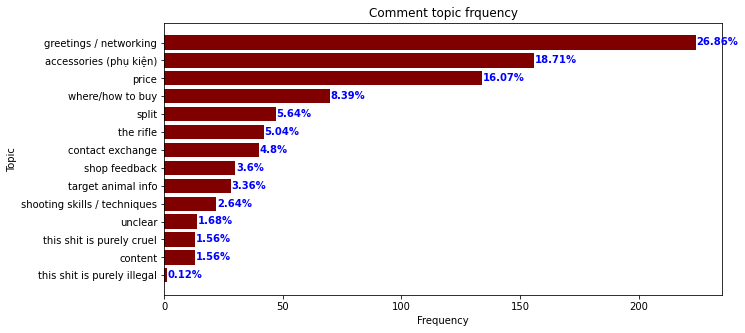

In [ ]:
# plot comment topic frequency
plt = dautils.bar_plot(topic_freq, 
                 xlabel='Frequency', 
                 ylabel='Topic', 
                 title='Comment topic frquency',
                 orientation='horizontal',
                 )

# save image
utils.save_image(plt, visualization_folder_path, "comment_topic_frequency.jpg")

File is saved to pro_against_pie.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Comment/pro_against_pie.jpg


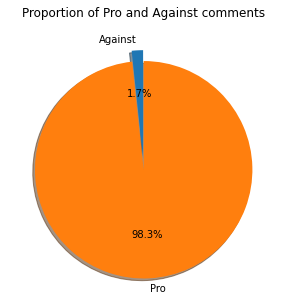

In [ ]:
# pro/against pie chart
num_pro = topic_list.isin(['this shit is purely cruel', 'this shit is purely illegal']).sum()
num_against = len(topic_list) - (topic_list.isin(['this shit is purely cruel', 'this shit is purely illegal'])).sum()

plt.figure(figsize=(5,5))
plt.pie([num_pro, num_against], explode=[0, 0.1], labels=['Against', 'Pro'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Pro and Against comments')

utils.save_image(plt, visualization_folder_path, "pro_against_pie.jpg")

In [9]:
# number of distinct user
annotation_data.author_channel_id.nunique()

663